# INTRODUCTION
* In this kernel, we will visualise Video Game Sales Dataset by using plotly library.
    * Plotly library: Plotly's Python graphing library makes interactive, publication-quality graphs online. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

<br>Content:
1. [Loading Data and Explanation of Features](#1)
1. [Line Charts](#2)
1. [Scatter Charts](#3)
1. [Bar Charts](#4)
1. [Pie Charts](#5)
1. [Bubble Charts](#6)
1. [Histogram](#7)
1. [Word Cloud](#8)
1. [Box Plot](#9)
1. [Scatter Plot Matrix](#10)
1. [Inset Plots](#11)
1. [3D Scatter Plot with Colorscaling](#12)
1. [Multiple Subplots](#13)


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/videogamesales/vgsales.csv


<a id="1"></a> <br>
# Loading Data and Explanation of Features

In [2]:
# Load data that we will use.
vgsales = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# As you can see from info method. There are 16598.
# However, Year has 16327 entries. That means Year has NAN value.
# Also Year should be integer but it is given as float. Therefore we will convert it.
# In addition, publisher has NAN values.
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Lets start with dropping nan values
vgsales.dropna(how="any",inplace = True)
# Then convert data from float to int
vgsales.Year = vgsales.Year.astype(int)
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


As you see here there is no NaN value anymore.

### Video Game Sales Dataset includes 11 features that are:

    1. Rank             
    2. Name       
    3. Platform               
    4. Year                
    5. Genre            
    6. Publisher                 
    7. NA_Sales                
    8. EU_Sales                   
    9. JP_Sales              
    10. Other_Sales             
    11. Global Sales      

<a id="2"></a> <br>
# Line Charts
Line Charts Example: Sales in North America (in millions) and Sales in Europe (in millions) vs Rank of Top 100 Video Games
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [5]:
# prepare data frame
df = vgsales.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.Rank,
                    y = df.NA_Sales,
                    mode = "lines",
                    name = "NA_Sales",
                    marker = dict(color = 'rgba(69, 40, 202, 0.8)'),
                    text= df.Name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.Rank,
                    y = df.EU_Sales,
                    mode = "lines+markers",
                    name = "EU_Sales",
                    marker = dict(color = 'rgba(227, 134, 211, 0.8)'),
                    text= df.Name)
data = [trace1, trace2]
layout = dict(title = 'Sales in North America (in millions) and Sales in Europe (in millions) vs Rank of Top 100 Video Games',
              xaxis= dict(title= 'World Rank',ticklen= 9,zeroline= True)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="3"></a> <br>
# Scatter
Scatter Example: Total worldwide sales vs world rank of top 100 Games with 2010, 2011 and 2012 years
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * title = title of layout
    * x axis = it is dictionary
        * title = label of x axis
        * ticklen = length of x axis ticks
        * zeroline = showing zero line or not
    * y axis = it is dictionary and same with x axis
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [6]:
# prepare data frames
df2010 = vgsales[vgsales.Year == 2010].iloc[:100,:]
df2011 = vgsales[vgsales.Year == 2011].iloc[:100,:]
df2012 = vgsales[vgsales.Year == 2012].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2010.Rank,
                    y = df2010.Global_Sales,
                    mode = "markers",
                    name = "2010",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2010.Name)
# creating trace2
trace2 =go.Scatter(
                    x = df2011.Rank,
                    y = df2011.Global_Sales,
                    mode = "markers",
                    name = "2011",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2011.Name)
# creating trace3
trace3 =go.Scatter(
                    x = df2012.Rank,
                    y = df2012.Global_Sales,
                    mode = "markers",
                    name = "2012",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2012.Name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Total Worldwide Sales (in millions) vs World Rank of top 100 Games with 2010, 2011 and 2012 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Worldwide Sales',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<a id="4"></a> <br>
# Bar Charts
First Bar Charts Example: Sales in Europe (in millions) and Sales in Japan (in millions) of top 3 Video Games in 2015
* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [7]:
# prepare data frames
df2015 = vgsales[vgsales.Year == 2015].iloc[:3,:]
df2015

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67


In [8]:
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2015.Name,
                y = df2015.EU_Sales,
                name = "Sales in Europe",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Platform)
# create trace2 
trace2 = go.Bar(
                x = df2015.Name,
                y = df2015.JP_Sales,
                name = "Sales in Japan",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2015.Platform)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

<a id="5"></a> <br>
# Pie Charts
Pie Charts Example: Total Sales rate of top 5 Video Games in 2014

* fig: create figures
    * data: plot type
        * values: values of plot
        * labels: labels of plot
        * name: name of plots
        * hoverinfo: information in hover
        * hole: hole width
        * type: plot type like pie
    * layout: layout of plot
        * title: title of layout
        * annotations: font, showarrow, text, x, y

In [9]:
# data preparation
df2014 = vgsales[vgsales.Year == 2014].iloc[:5,:]
pie1 = df2014.Global_Sales
labels = df2014.Name
# figure
fig = {
  "data": [
    {
      "values": pie1,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Toatal Sales Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Video Games Total Sales Rates",
        "annotations": [
            { "font": { "size": 1},
              "showarrow": False,
              "text": "Total Sales",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

<a id="6"></a> <br>
# Bubble Charts
Bubble Charts Example: World rank (first 20) vs Nort America Sales with Europe Sales and Global Sales (color) in 2015
* x = x axis
* y = y axis
* mode = markers(scatter)
*  marker = marker properties
    * color = third dimension of plot. Internaltional score
    * size = fourth dimension of plot. Number of students
* text: university names

In [10]:
# data preparation
df2015 = vgsales[vgsales.Year == 2015].iloc[:20,:]

data = [
    {
        'y': df2015.NA_Sales,
        'x': df2015.Rank,
        'mode': 'markers',
        'marker': {
            'color': df2015.EU_Sales,
            'size': df2015.Global_Sales,
            'showscale': True
        },
        "text" :  df2015.Name    
    }
]
iplot(data)

<a id="7"></a> <br>
# Histogram
Lets look at histogram of Global Sales in 2011 and 2012 years. 
* trace1 = first histogram
    * x = x axis
    * y = y axis
    * opacity = opacity of histogram
    * name = name of legend
    * marker = color of histogram
* trace2 = second histogram
* layout = layout 
    * barmode = mode of histogram like overlay. Also you can change it with *stack*

In [11]:
# prepare data
x2011 = vgsales[vgsales.Year == 2011].iloc[:200,:]
x2012 = vgsales[vgsales.Year == 2012].iloc[:200,:]
x2011=x2011.Global_Sales
x2012=x2012.Global_Sales

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(0, 250, 0, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(190, 0, 150, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' Global Sales in 2011 and 2012',
                   xaxis=dict(title='Global Sales'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="8"></a> <br>
# Word Cloud
Not a pyplot but learning it is good for visualization. Lets look at which Video Game is mentioned most in 2011.
* WordCloud = word cloud library that I import at the beginning of kernel
    * background_color = color of back ground
    * generate = generates the country name list(x2011) a word cloud

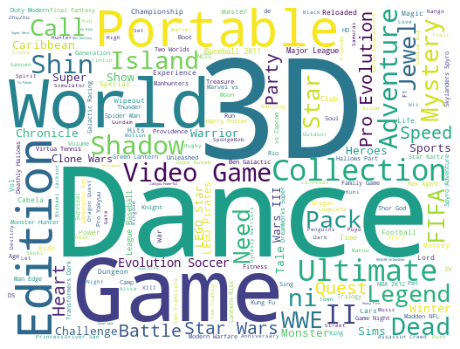

In [12]:
# data prepararion
x2011 = vgsales.Name[vgsales.Year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

<a id="9"></a> <br>
# Box Plots
* Box Plots
    * Median (50th percentile) = middle value of the data set. Sort and take the data in the middle. It is also called 50% percentile that is 50% of data are less that median(50th quartile)(quartile)
        * 25th percentile = quartile 1 (Q1) that is lower quartile
        * 75th percentile = quartile 3 (Q3) that is higher quartile
        * height of box = IQR = interquartile range = Q3-Q1
        * Whiskers = 1.5 * IQR from the Q1 and Q3
        * Outliers = being more than 1.5*IQR away from median commonly.
        
    * trace = box
        * y = data we want to visualize with box plot 
        * marker = color

In [13]:
# data preparation
x2015 = vgsales[vgsales.Year == 2015].iloc[:100,:] # For first 100 Video Games

trace0 = go.Box(
    y=x2015.Global_Sales,
    name = 'Global Sales of  Video Games in 2015',
    marker = dict(
        color = 'rgb(255, 0, 0)',
    )
)
trace1 = go.Box(
    y=x2015.EU_Sales,
    name = 'Europe Sales of  Video Games in 2015',
    marker = dict(
        color = 'rgb(0, 0, 255)',
    )
)
data = [trace0, trace1]
iplot(data)

<a id="10"></a> <br>
# Scatter Matrix Plots
Scatter Matrix = it helps us to see covariance and relation between more than 2 features
* import figure factory as ff
* create_scatterplotmatrix = creates scatter plot
    * data2015 = prepared data. It includes NA_Sales, NA_Sales and NA_Sales with index from 1 to 601
    * colormap = color map of scatter plot
    * colormap_type = color type of scatter plot
    * height and weight

In [14]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = vgsales[vgsales.Year == 2015]
data2015 = dataframe.loc[:,["NA_Sales","EU_Sales", "JP_Sales"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

<a id="11"></a> <br>
# Inset Plots
<font color='Blue'>
Inset Matrix = 2 plots are in one frame
<font color='black'>

In [15]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.Global_Sales,
    name = "Global_Sales",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.EU_Sales,
    xaxis='x2',
    yaxis='y2',
    name = "EU_Sales",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'EU_Sales and Global_Sales vs Rank of Video Games'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)


<a id="12"></a> <br>
# 3D Scatter Plot with Colorscaling
3D Scatter: Sometimes 2D is not enough to understand data. Therefore adding one more dimension increase the intelligibility of the data. Even we will add color that is actually 4th dimension.
<font color='black'>
* go.Scatter3d: create 3d scatter plot
* x,y,z: axis of plots
* mode: market that is scatter
* size: marker size
* color: axis of colorscale
* colorscale:  actually it is 4th dimension

In [16]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.Rank,
    y=dataframe.Other_Sales,
    z=dataframe.JP_Sales,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(0,0,255)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="13"></a> <br>
# Multiple Subplots
<font color='Blue'>
Multiple Subplots: While comparing more than one features, multiple subplots can be useful.
<font color='black'>

In [17]:
trace1 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.Global_Sales,
    name = "Global_Sales"
)
trace2 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.EU_Sales,
    xaxis='x2',
    yaxis='y2',
    name = "EU_Sales"
)
trace3 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.JP_Sales,
    xaxis='x3',
    yaxis='y3',
    name = "JP_Sales"
)
trace4 = go.Scatter(
    x=dataframe.Rank,
    y=dataframe.NA_Sales,
    xaxis='x4',
    yaxis='y4',
    name = "NA_Sales"
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    xaxis=dict(
        domain=[0, 0.45]
    ),
    yaxis=dict(
        domain=[0, 0.45]
    ),
    xaxis2=dict(
        domain=[0.55, 1]
    ),
    xaxis3=dict(
        domain=[0, 0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55, 1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0, 0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55, 1]
    ),
    yaxis4=dict(
        domain=[0.55, 1],
        anchor='x4'
    ),
    title = 'NA_Sales, EU_Sales, JP_Sales and Global_Sales VS World Rank of Video Games'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)